# Prescriptor robojudge
Notebook for evaluating prescriptions using standard predictor.

The main metric computed is based on how many other prescriptions
each submission dominates on the pareto front of stringency vs cases.

In [1]:
import os

import sys
sys.path.append('/Users/ahmedbegga/Desktop/UPV/trabajo/valencia-ia4covid-xprize')

import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from covid_xprize.standard_predictor.xprize_predictor import NPI_COLUMNS
from covid_xprize.scoring.prescriptor_scoring import weight_prescriptions_by_cost
from covid_xprize.scoring.prescriptor_scoring import generate_cases_and_stringency_for_prescriptions
from covid_xprize.scoring.prescriptor_scoring import compute_domination_df
from covid_xprize.scoring.prescriptor_scoring import compute_pareto_set
from covid_xprize.validation.prescriptor_validation import validate_submission

In [2]:
# Can set these longer for better evaluation. Will increase eval time
START_DATE = "2021-7-01"
END_DATE = "2021-7-30"

# Prepare Historical IP Data

In [3]:
from covid_xprize.scoring.predictor_scoring import load_dataset
from covid_xprize.validation.scenario_generator import generate_scenario

LATEST_DATA_URL = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_nat_latest.csv'
GEO_FILE = "countries_regions.csv"

latest_df = load_dataset(LATEST_DATA_URL, GEO_FILE)

In [4]:
IP_FILE = "prescriptions/robojudge_test_scenario.csv"
os.makedirs(os.path.dirname(IP_FILE), exist_ok=True)
countries = None
scenario_df = generate_scenario(START_DATE, END_DATE, latest_df, countries, scenario="Freeze")
scenario_df.to_csv(IP_FILE, index=False)

# Generate some prescriptions

In [5]:
# Cost weightings for each IP for each geo
TEST_COST = "covid_xprize/validation/data/uniform_random_costs.csv"
# Rename columns to match prescription file
#cost_df = pd.read_csv(TEST_COST)
#cost_df = cost_df.rename(columns={ 'C1_School closing': 'C1M_School closing', 'C2_Workplace closing': 'C2M_Workplace closing', 'C3_Cancel public events': 'C3M_Cancel public events', 'C4_Restrictions on gatherings': 'C4M_Restrictions on gatherings', 'C5_Close public transport': 'C5M_Close public transport', 'C6_Stay at home requirements': 'C6M_Stay at home requirements', 'C7_Restrictions on internal movement': 'C7M_Restrictions on internal movement', 'C8_International travel controls': 'C8EV_International travel controls', 'H1_Public information campaigns': 'H1_Public information campaigns', 'H2_Testing policy': 'H2_Testing policy', 'H3_Contact tracing': 'H3_Contact tracing', 'H6_Facial Coverings': 'H6M_Facial Coverings'})
# Y guardamos el fichero
#cost_df.to_csv(TEST_COST, index=False)

In [6]:
# Generate some random prescriptions
for i in range(2):
    output_file = "covid_xprize/examples/prescriptors/random/prescriptions/random_presc_"+ str(i+1) +".csv"
    !python covid_xprize/examples/prescriptors/random/prescribe.py -s {START_DATE} \
                                                                   -e {END_DATE} \
                                                                   -ip {IP_FILE} \
                                                                   -c {TEST_COST} \
                                                                   -o {output_file}

Generating prescriptions from 2021-6-01 to 2021-6-30...
covid_xprize/examples/prescriptors/random/prescribe.py:34: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  hdf = pd.read_csv(path_to_hist_file,
Done!
Generating prescriptions from 2021-6-01 to 2021-6-30...
covid_xprize/examples/prescriptors/random/prescribe.py:34: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  hdf = pd.read_csv(path_to_hist_file,
Done!


In [7]:
'''# Generate blind_greedy prescriptions
output_file = "covid_xprize/examples/prescriptors/blind_greedy/prescriptions/blind_greedy.csv"
!python covid_xprize/examples/prescriptors/blind_greedy/prescribe.py -s {START_DATE} \
                                                                     -e {END_DATE} \
                                                                     -ip {IP_FILE} \
                                                                     -c {TEST_COST} \
                                                                     -o {output_file}'''

'# Generate blind_greedy prescriptions\noutput_file = "covid_xprize/examples/prescriptors/blind_greedy/prescriptions/blind_greedy.csv"\n!python covid_xprize/examples/prescriptors/blind_greedy/prescribe.py -s {START_DATE}                                                                      -e {END_DATE}                                                                      -ip {IP_FILE}                                                                      -c {TEST_COST}                                                                      -o {output_file}'

In [8]:
'''# Generate feat_greedy prescriptions
output_file = "prescriptions/feat_greedy.csv"
!python prescribe_feat.py -s {START_DATE} \
          -e {END_DATE} \
          -ip {IP_FILE} \
          -c {TEST_COST} \
          -o {output_file}'''

'# Generate feat_greedy prescriptions\noutput_file = "prescriptions/feat_greedy.csv"\n!python prescribe_feat.py -s {START_DATE}           -e {END_DATE}           -ip {IP_FILE}           -c {TEST_COST}           -o {output_file}'

In [9]:
%%time
# Generate VALENCIA IA4COVID19 prescriptions
output_file = "prescriptions/valencia_h7_sus_combined_jul.csv"
!python prescribe.py -s {START_DATE} \
          -e {END_DATE} \
          -ip {IP_FILE} \
          -c {TEST_COST} \
          -o {output_file}

Generating prescriptions from 2021-6-01 to 2021-6-30...
Loading past IPs data...
/home/dirdma/Modelo Ahmed/valencia-ia4covid-xprize/covid_xprize/examples/prescriptors/neat/utils.py:100: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(path_to_ips_file,
/home/dirdma/Modelo Ahmed/valencia-ia4covid-xprize/valencia_predictor.py:583: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  latest_df = pd.read_csv(data_url,
/home/dirdma/Modelo Ahmed/valencia-ia4covid-xprize/valencia_predictor.py:630: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  additional_context_df = additional_context_df.append(additional_us_states_df)
/home/dirdma/Modelo Ahmed/valencia-ia4covid-xprize/valencia_predictor.py:635: FutureWarning: T

In [10]:
prescription_files = {
#     'NeatExample': 'covid_xprize/examples/prescriptors/neat/test_prescriptions/pres.csv',
#    'Random1': 'covid_xprize/examples/prescriptors/random/prescriptions/random_presc_1.csv',
#    'Random2': 'covid_xprize/examples/prescriptors/random/prescriptions/random_presc_2.csv',
#    'BlindGreedy': 'covid_xprize/examples/prescriptors/blind_greedy/prescriptions/blind_greedy.csv',
#    'FeatGreedy': 'prescriptions/feat_greedy.csv',
    'V4C': 'prescriptions/valencia_h7_sus_combined_jul.csv'
}

In [11]:
# Validate the prescription files
for prescriptor_name, output_file in prescription_files.items():
    errors = validate_submission(START_DATE, END_DATE, IP_FILE, output_file)
    if errors:
        for error in errors:
            print(f"{prescriptor_name}: {error}")
    else:
        print(f"{prescriptor_name}: All good!")

V4C: Missing columns: {'H7_Vaccination policy'}


In [12]:
print(TEST_COST)
print(IP_FILE)

covid_xprize/validation/data/uniform_random_costs.csv
prescriptions/robojudge_test_scenario.csv


# Evaluate them

In [13]:
# Collect case and stringency data for all prescriptors
dfs = []
for prescriptor_name, prescription_file in sorted(prescription_files.items()):
    print("Generating predictions for", prescriptor_name)
    df, preds = generate_cases_and_stringency_for_prescriptions(START_DATE, END_DATE, prescription_file, TEST_COST, IP_FILE)
    df['PrescriptorName'] = prescriptor_name
    dfs.append(df)
df = pd.concat(dfs)

Generating predictions for V4C
Generated predictions for PrescriptionIndex 0
Generated predictions for PrescriptionIndex 1
Generated predictions for PrescriptionIndex 2
Generated predictions for PrescriptionIndex 3
Generated predictions for PrescriptionIndex 4
Generated predictions for PrescriptionIndex 5
Generated predictions for PrescriptionIndex 6
Generated predictions for PrescriptionIndex 7
Generated predictions for PrescriptionIndex 8
Generated predictions for PrescriptionIndex 9
Evaluated 10 PrescriptionIndex in 00:19:13 seconds


In [14]:
df[df['CountryName'] == 'Spain']

,CountryName,RegionName,PrescriptionIndex,PredictedDailyNewCases,Stringency,PrescriptorName
1510,Spain,NaN,0,7280.737605,0.00,V4C
1511,Spain,NaN,1,7280.737605,0.00,V4C
1512,Spain,NaN,2,6774.337514,0.08,V4C
1513,Spain,NaN,3,6774.337514,0.08,V4C
1514,Spain,NaN,4,6347.427178,0.16,V4C
1515,Spain,NaN,5,6347.427178,0.16,V4C
1516,Spain,NaN,6,5983.246856,0.24,V4C
1517,Spain,NaN,7,5983.246856,0.24,V4C
1518,Spain,NaN,8,4429.378475,15.61,V4C
1519,Spain,NaN,9,4429.378475,15.61,V4C


In [15]:
df.to_csv('stringency_combined_h7_sus_jul.csv', index=False)
# Store the predictions for the prescriptors



In [16]:
!ls

2020-08-01_2020-08-04_predictions_example.csv
2020-08-01_2020-08-04_prescriptions_example.csv
ahmed.csv
codefresh.yml
countries_regions.csv
countries_regions_phase1_fix.csv
covid_xprize
data
Dockerfile
docs
Foto1.png
Foto2.png
graficas.ipynb
__init__.py
LICENSE.md
logo.png
model
models
packages.txt
Pagina.py
predictions
predictions_algo.csv
predictions.csv
predictor_no_region.ipynb
predictor_robojudge.ipynb
predictor_submission_template.ipynb
predictor_train_no_region.ipynb
predictor_train_no_region_v2.ipynb
predict.py
prescribe_feat.py
prescribe.py
prescriptions
prescriptor_robojudge.ipynb
prescriptor_submission_template.ipynb
__pycache__
README.md
reinfectados.csv
requirements.txt
resources.md
run_experiments.sh
secur.py
setup.py
Streamlit
stringency_combined_h7_sus_feb.csv
stringency_combined_h7_sus_jan.csv
stringency.csv
train.py
Untitled.ipynb
valencia_ant_predictor.py
valencia_predictor.py
valencia_predictor_v2.py


In [ ]:
ddf = compute_domination_df(df)

Computing domination for Afghanistan nan
Computing domination for Albania nan
Computing domination for Algeria nan
Computing domination for Andorra nan
Computing domination for Angola nan
Computing domination for Argentina nan
Computing domination for Aruba nan
Computing domination for Australia nan
Computing domination for Austria nan
Computing domination for Azerbaijan nan
Computing domination for Bahamas nan
Computing domination for Bahrain nan
Computing domination for Bangladesh nan
Computing domination for Barbados nan
Computing domination for Belarus nan
Computing domination for Belgium nan
Computing domination for Belize nan
Computing domination for Benin nan
Computing domination for Bermuda nan
Computing domination for Bhutan nan
Computing domination for Bolivia nan
Computing domination for Bosnia and Herzegovina nan
Computing domination for Botswana nan
Computing domination for Brazil nan
Computing domination for Brunei nan
Computing domination for Bulgaria nan
Computing domin

Computing domination for Vietnam nan
Computing domination for Yemen nan
Computing domination for Zambia nan
Computing domination for Zimbabwe nan


In [ ]:
# Get number of dominated prescriptions for each submission. This is the "Domination Count"
ddf.groupby('DominatingName').count().sort_values('DominatedIndex', ascending=False)['DominatedIndex']

DominatingName
FeatGreedy     4032
V4C            4032
BlindGreedy    3138
Random2         974
Random1         932
Name: DominatedIndex, dtype: int64

In [16]:
def plot_pareto_curve(objective1_list, objective2_list):
    """
    Plot the pareto curve given the objective values for a set of solutions.
    This curve indicates the area dominated by the solution set, i.e., 
    every point up and to the right is dominated.
    """
    
    # Compute pareto set from full solution set.
    objective1_pareto, objective2_pareto = compute_pareto_set(objective1_list, 
                                                              objective2_list)
    
    # Sort by first objective.
    objective1_pareto, objective2_pareto = list(zip(*sorted(zip(objective1_pareto,
                                                                objective2_pareto))))
    
    # Compute the coordinates to plot.
    xs = []
    ys = []
    
    xs.append(objective1_pareto[0])
    ys.append(objective2_pareto[0])
    
    for i in range(0, len(objective1_pareto)-1):
        
        # Add intermediate point between successive solutions
        xs.append(objective1_pareto[i+1])
        ys.append(objective2_pareto[i])
        
        # Add next solution on front
        xs.append(objective1_pareto[i+1])
        ys.append(objective2_pareto[i+1])
        
    plt.plot(xs, ys)

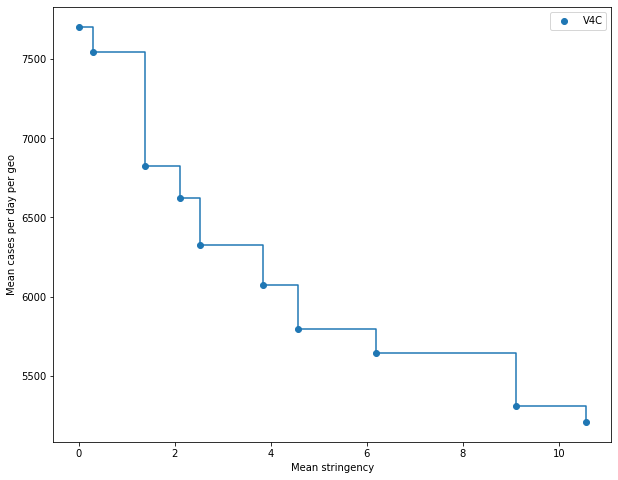

In [17]:
# Plot overall stringency and cases of each prescription
plt.figure(figsize=(10,8))
for prescriptor_name in prescription_files:
    pdf = df[df['PrescriptorName'] == prescriptor_name]
    overall_pdf = pdf.groupby('PrescriptionIndex').mean().reset_index()
    plt.scatter(overall_pdf['Stringency'],
                overall_pdf['PredictedDailyNewCases'], 
                label=prescriptor_name)
    plot_pareto_curve(list(overall_pdf['Stringency']),
                      list(overall_pdf['PredictedDailyNewCases']))
plt.xlabel('Mean stringency')
plt.ylabel('Mean cases per day per geo')
plt.legend()
plt.show()

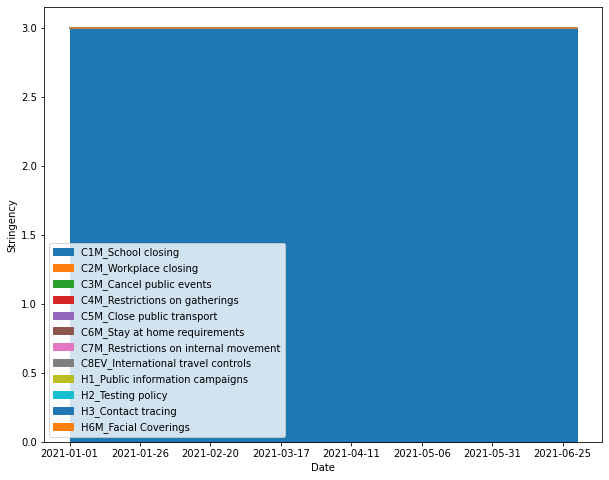

In [10]:
# Plot stacked line chart of npis over time for a prescription for a particular geo

#submission_file = 'covid_xprize.examples/prescriptors/neat/test_prescriptions/pres.csv'
#submission_file = 'covid_xprize/examples/prescriptors/random/prescriptions/random_presc_1.csv'
submission_file = 'prescriptions/valencia.csv'
submission_file = 'prescriptions/valencia_h7_sus.csv'
submission_file = 'prescriptions/valencia_h7_sus_economic.csv'
sumbm
prescription_index = 2
country_name = 'Spain'
region_name = None

pdf = pd.read_csv(submission_file)
gdf = pdf[(pdf['PrescriptionIndex'] == prescription_index) &
          (pdf['CountryName'] == country_name) &
          (pdf['RegionName'].isna() if region_name is None else (pdf['RegionName'] == 'region_name'))]
gdf.plot.area(x='Date', y=NPI_COLUMNS, figsize=(10,8), ylabel='Stringency')
plt.show()

In [13]:
gdf.columns

Index(['Date', 'CountryName', 'RegionName', 'PrescriptionIndex',
       'C1M_School closing', 'C2M_Workplace closing',
       'C3M_Cancel public events', 'C4M_Restrictions on gatherings',
       'C5M_Close public transport', 'C6M_Stay at home requirements',
       'C7M_Restrictions on internal movement',
       'C8EV_International travel controls', 'H1_Public information campaigns',
       'H2_Testing policy', 'H3_Contact tracing', 'H6M_Facial Coverings'],
      dtype='object')

In [12]:
import plotly.express as px
#submission_file = 'prescriptions/valencia.csv'
sumbission_file = 'prescriptions/valencia_h7_sus.csv'
submission_file = 'prescriptions/valencia_h7_sus_economic.csv'
prescription_index = 1
country_name = 'Spain'
region_name = None
pdf = pd.read_csv(submission_file)
gdf = pdf[(pdf['PrescriptionIndex'] == prescription_index) &
          (pdf['CountryName'] == country_name) &
          (pdf['RegionName'].isna() if region_name is None else (pdf['RegionName'] == 'region_name'))]
fig = px.bar(gdf, x =gdf['Date'], y=NPI_COLUMNS)
fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in np.arange(0, 10):
    gdf = pdf[(pdf['PrescriptionIndex'] == step) &
          (pdf['CountryName'] == country_name) &
          (pdf['RegionName'].isna() if region_name is None else (pdf['RegionName'] == 'region_name'))]
    fig.add_trace(go.Bar(x =gdf['Date'], y=NPI_COLUMNS))

# Make 10th trace visible
print(len(fig.data))
fig.data[9].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=9,
    currentvalue={"prefix": "Index: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

10


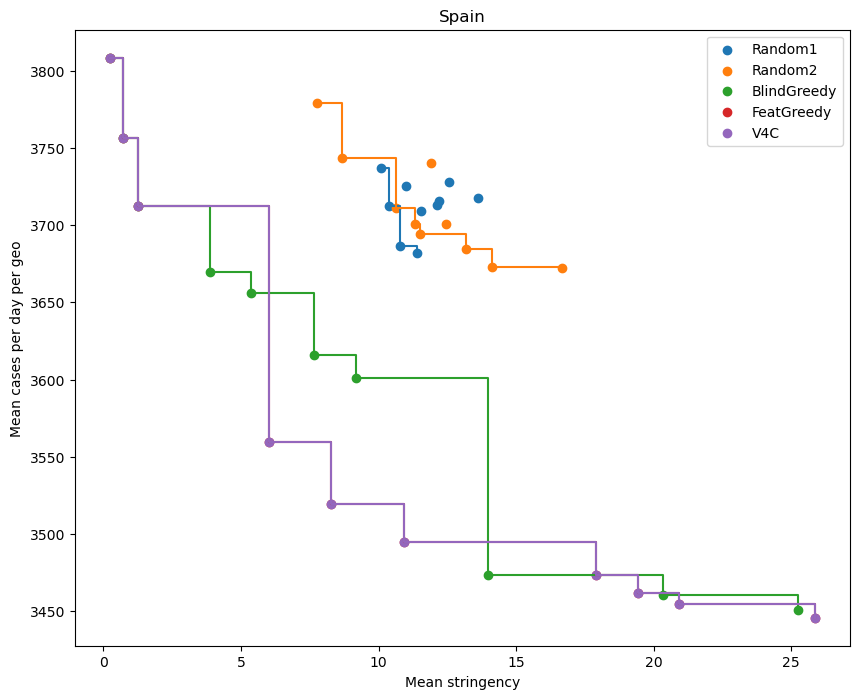

In [ ]:
# Plot stringency and cases of each prescription for a particular country
country_name = 'Spain'
cdf = df[df.CountryName == country_name]

plt.figure(figsize=(10,8))
for prescriptor_name in prescription_files:
    pdf = cdf[cdf['PrescriptorName'] == prescriptor_name]
    #overall_pdf = pdf.groupby('PrescriptionIndex').mean().reset_index()
    plt.scatter(pdf['Stringency'],
                pdf['PredictedDailyNewCases'], 
                label=prescriptor_name)
    plot_pareto_curve(list(pdf['Stringency']),
                      list(pdf['PredictedDailyNewCases']))
plt.xlabel('Mean stringency')
plt.ylabel('Mean cases per day per geo')
plt.title(country_name)
plt.legend()
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
def plot_pareto_curve_plotly(objective1_list, objective2_list):
    """
    Plot the pareto curve given the objective values for a set of solutions.
    This curve indicates the area dominated by the solution set, i.e., 
    every point up and to the right is dominated.
    """
    
    # Compute pareto set from full solution set.
    objective1_pareto, objective2_pareto = compute_pareto_set(objective1_list, 
                                                              objective2_list)
    
    # Sort by first objective.
    objective1_pareto, objective2_pareto = list(zip(*sorted(zip(objective1_pareto,
                                                                objective2_pareto))))
    
    # Compute the coordinates to plot.
    xs = []
    ys = []
    
    xs.append(objective1_pareto[0])
    ys.append(objective2_pareto[0])
    
    for i in range(0, len(objective1_pareto)-1):
        
        # Add intermediate point between successive solutions
        xs.append(objective1_pareto[i+1])
        ys.append(objective2_pareto[i])
        
        # Add next solution on front
        xs.append(objective1_pareto[i+1])
        ys.append(objective2_pareto[i+1])
        
    return xs, ys

In [ ]:
pdf

,CountryName,RegionName,PrescriptionIndex,PredictedDailyNewCases,Stringency,PrescriptorName
1510,Spain,NaN,0,3808.310542,0.24,V4C
1511,Spain,NaN,1,3756.080079,0.72,V4C
1512,Spain,NaN,2,3712.250137,1.24,V4C
1513,Spain,NaN,3,3559.911934,6.01,V4C
1514,Spain,NaN,4,3519.654535,8.29,V4C
1515,Spain,NaN,5,3494.991663,10.93,V4C
1516,Spain,NaN,6,3473.310691,17.89,V4C
1517,Spain,NaN,7,3461.826409,19.45,V4C
1518,Spain,NaN,8,3454.948193,20.93,V4C
1519,Spain,NaN,9,3445.870364,25.85,V4C


In [ ]:
pdf = df[(df['PrescriptorName'] == 'V4C') & (df.CountryName == 'Spain')]
#overall_pdf = pdf.groupby('PrescriptionIndex').mean().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=pdf['Stringency'],y=pdf['PredictedDailyNewCases'],name="V4C", mode='markers',marker=dict(size=10,color = 'rgb(29, 210, 235 )',
                              line=dict(width=1,
                                        color='DarkSlateGrey'))))
xs, ys = plot_pareto_curve_plotly(list(pdf['Stringency']),list(pdf['PredictedDailyNewCases']))
#go.Scatter(xs, ys, mode='lines')
fig.add_trace(go.Scatter(x=xs,y=ys, mode='lines',marker=dict(size=10,color = 'rgb(29, 126, 235 )')))
fig.update_layout(showlegend=False)
fig.update_xaxes(title_text="Mean Stringency")
fig.update_yaxes(title_text="Mean case per day per geo")
fig.update_layout(title_text='Spain', title_x=0.5)

fig.show()
overall_pdf.head(10)
pdf.head(3)


,CountryName,RegionName,PrescriptionIndex,PredictedDailyNewCases,Stringency,PrescriptorName
1510,Spain,NaN,0,3808.310542,0.24,V4C
1511,Spain,NaN,1,3756.080079,0.72,V4C
1512,Spain,NaN,2,3712.250137,1.24,V4C


In [ ]:
df[df.PrescriptorName == 'V4C'].head(10)

In [ ]:
pdf.columns

In [ ]:
i = j = [3]
i+=j
i